# **Najeeb ullah**

# **Rice Diseases are classification using CNN with TensorFlow**

In [31]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [32]:
# import trai.cv file
data = pd.read_csv('./data/train.csv')
data.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [33]:
# check the shape
data.shape

(10407, 4)

In [34]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [35]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [36]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

In [37]:
# plot the data count based on variety name using matplotlib 

fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.countplot(x='variety',data=data,ax=axes)
plt.title(' Variety Distribution in the Dataset')
plt.show()

In [38]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.countplot(x='label',data=data,ax=axes)
plt.title(' disease Distribution in the Dataset')
plt.show()

In [39]:
normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normal = normal.image_id[:5].values
five_normal.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [40]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_dead = dead.image_id[:5].values
five_dead.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

In [41]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))

columns = 5 
path = "./data/train_images/"
for i, image_loc in enumerate(np.concatenate((five_normal, five_dead))):
    plt.subplot(10//columns + 1 , columns, i+1)   

    if i < 5:
        try:
            Image=plt.imread(path +"normal/" +image_loc)
            plt.title("normal")
            plt.imshow(Image)
        except FileNotFoundError:
            print(f"File not found: {path}normal/{image_loc}")
    else:
        try:
            Image=plt.imread(path +"dead_heart/" +image_loc)
            plt.title("dead heart disease")
            plt.imshow(Image)
        except FileNotFoundError:
            print(f"File not found: {path}dead_heart/{image_loc}")
# columns = 5 
# path = " ./data/train_images/"
# for i, image_loc in enumerate(np.concatenate((five_normal, five_dead))):
#     plt.subplot(10//columns + 1 , columns, i+1)   

#     if i < 5:
#         Image=plt.imread(path +"normal/" +image_loc)
#         plt.title("normal")

#     else:
#         plt.title("dead heart disease")
#         Image=plt.imread(path +"dead_heart/" +image_loc)
    plt.imshow(Image)
   



In [42]:
# every disease images 
images = [
    "./data/train_images/hispa/106590.jpg",
    "./data/train_images/brown_spot/104675.jpg",
    "./data/train_images/downy_mildew/102350.jpg",
    "./data/train_images/normal/109760.jpg",
    "./data/train_images/tungro/109629.jpg",
    "./data/train_images/bacterial_leaf_blight/109372.jpg",
    "./data/train_images/bacterial_panicle_blight/101351.jpg",
    "./data/train_images/bacterial_leaf_streak/101104.jpg",
    "./data/train_images/dead_heart/105159.jpg",
    "./data/train_images/blast/110243.jpg",
    
]
disease = ['hispa','brown_spot', 'tungro', 'downy_mildew', 'normal',
            'bacterial_leaf_blight', 'bacterial_panicle_blight',
              'bacterial_leaf_streak', 'dead_heart','blast']
disease = [disease + 'image' for disease in disease]

# plot the all of the above images
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(10//columns + 1 , columns, i+1)   
    try:
        Image=plt.imread(image_loc)
        plt.title(disease[i])
        plt.imshow(Image)
    except FileNotFoundError:
        print(f"File not found: {image_loc}")

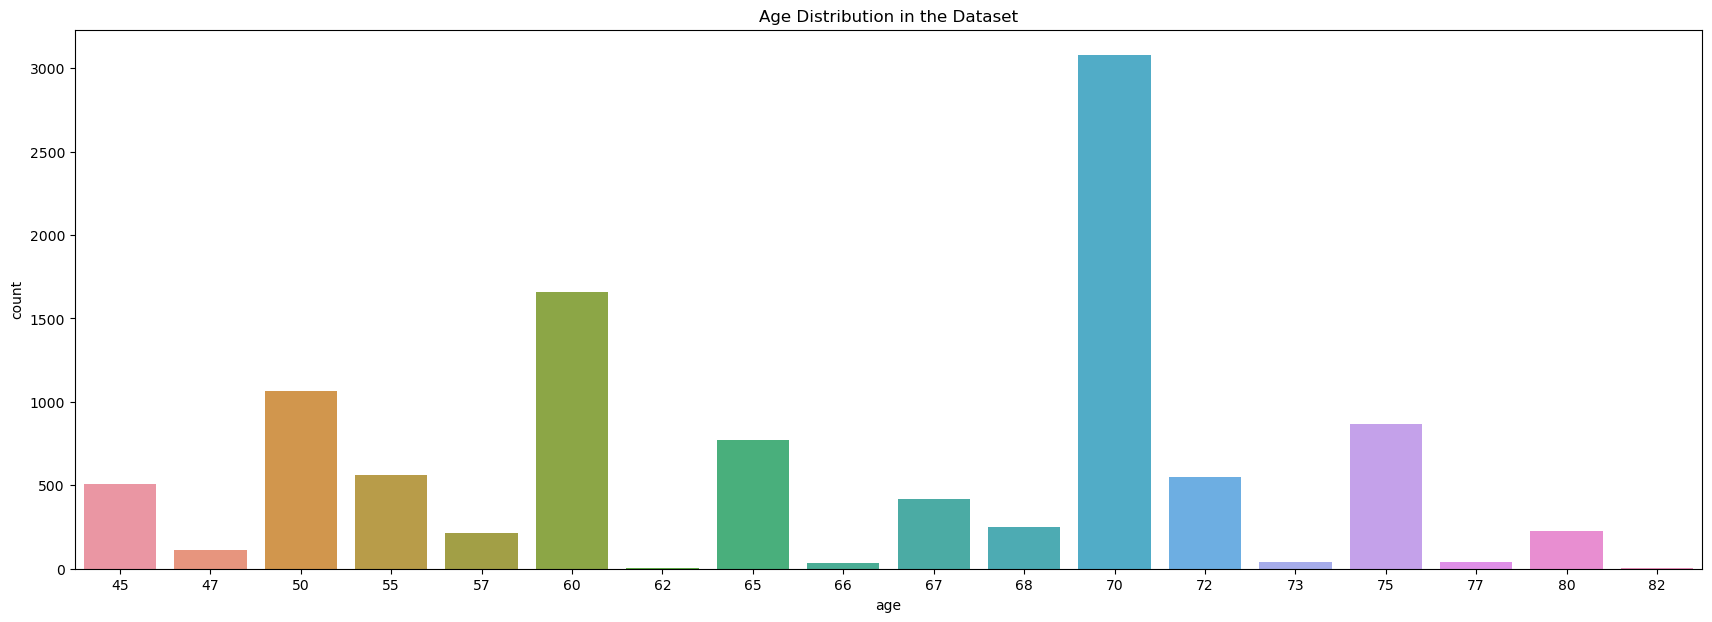

In [43]:
# make plot of images just to have an idea 
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.countplot(x='age',data=data,ax=axes)
plt.title('Age Distribution in the Dataset')
plt.show()

In [44]:
data.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [45]:
# encode both of columns lable and variety
from sklearn.preprocessing import LabelEncoder

data['label'] = LabelEncoder().fit_transform(data['label'])
data['variety'] = LabelEncoder().fit_transform(data['variety'])

data.head()


image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

In [46]:
# define parameter 
batch_size = 32
img_height = 224
img_width = 224

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   path,
   validation_split=0.2,
   subset="training",
   seed=123,
   image_size=(img_height, img_width),
   batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [48]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
   path,
   validation_split=0.2,
   subset="validation",
   seed=123,
   image_size=(img_height, img_width),
   batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [49]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


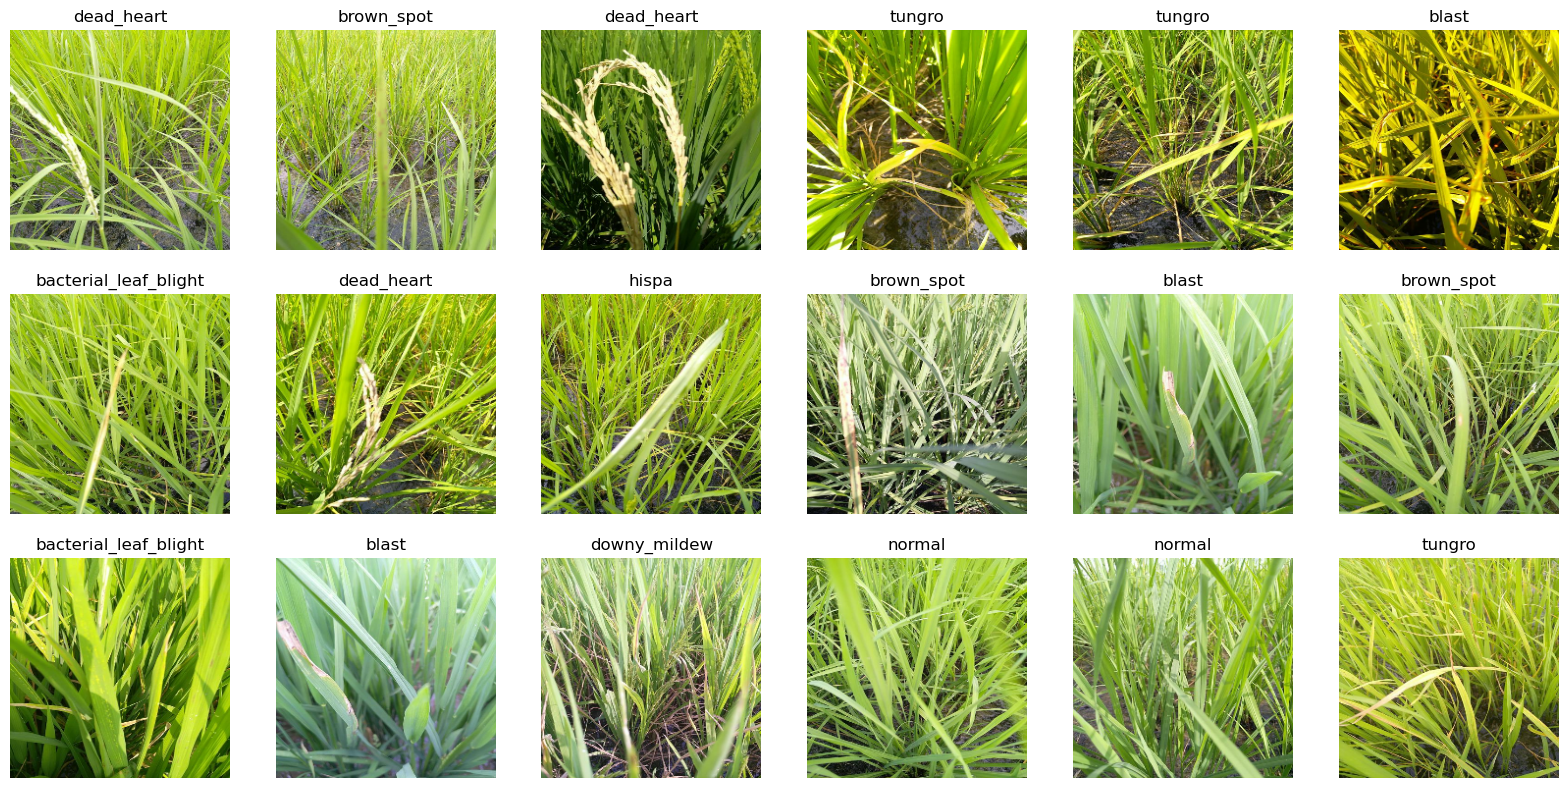

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(min(18, len(images))):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [51]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [52]:
# noraml the data 
normalization_layer = tf.keras.layers.Rescaling(1./255)


normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [53]:
# Autotune the dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
num_classes = len(class_names)
print("Number of classes: ",num_classes)





Number of classes:  10


In [55]:
# model define 

num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [56]:

# complie model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/50


c:\Users\HP\miniconda3\envs\tf_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


261/261 [==============================] - 373s 1s/step - loss: 1.8050 - accuracy: 0.3732 - val_loss: 1.5124 - val_accuracy: 0.4940
Epoch 2/50
261/261 [==============================] - 308s 1s/step - loss: 1.1448 - accuracy: 0.6255 - val_loss: 1.1126 - val_accuracy: 0.6535
Epoch 3/50
261/261 [==============================] - 270s 1s/step - loss: 0.6933 - accuracy: 0.7784 - val_loss: 0.9224 - val_accuracy: 0.7314
Epoch 4/50
261/261 [==============================] - 268s 1s/step - loss: 0.4135 - accuracy: 0.8676 - val_loss: 0.9885 - val_accuracy: 0.7328
Epoch 5/50
261/261 [==============================] - 305s 1s/step - loss: 0.2486 - accuracy: 0.9211 - val_loss: 1.0376 - val_accuracy: 0.7424
Epoch 6/50
261/261 [==============================] - 319s 1s/step - loss: 0.1759 - accuracy: 0.9456 - val_loss: 1.1402 - val_accuracy: 0.7371
Epoch 7/50
261/261 [==============================] - 327s 1s/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 0.9770 - val_accuracy: 0.7958
Epoch 8/50

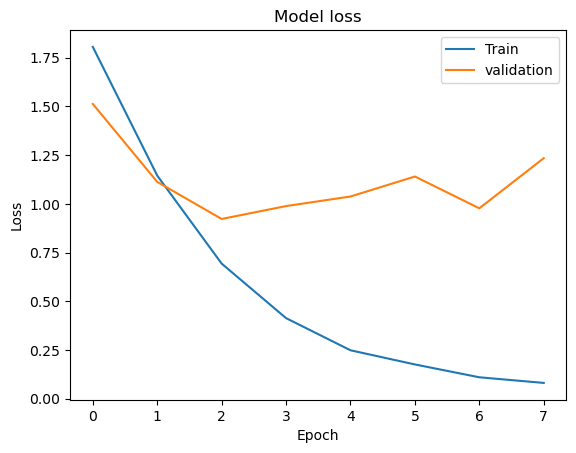

CPU times: total: 2h 4min 42s
Wall time: 41min 46s


In [57]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5 , monitor='val_loss',verbose=1)
                               

# train the model 
history= model.fit(train_ds, 
validation_data= val_ds,
epochs=50, callbacks=[early_stopping])


# evaluate the model
loss= model.evaluate(val_ds)



# plot the training and testting loss and accuracy at each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()




## **Observation**:

1. we have 10407, images in train data
2. we have 10 unique disease classes 
3. we also have 10 unique variety of rice in the data
4. we have rice plant age ranging from 45 - 82 dyas
5. ADT45 is the most common variety inside the data  